In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import feature_scoring
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler

import warnings
from sklearn import tree
from pprint import pprint 
import graphviz
import sklearn
import dtreeviz

import os
import sys
sys.path.insert(0, '..')

from archspace import AnticorruptionLayer, ArchSpace
from archspace import show_pairplot, show_feature_scores, show_outcome_distributions, show_tradeoff_distribution
from archspace import show_quality_attribute_space2D, show_configuration_space2D

In [2]:
# from os import listdir
# from os.path import isfile, join
# mypath = "./results-ACL-p-values"
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# list_dfs = []
# for f in onlyfiles:
#     df = pd.read_csv(mypath + "/" + f)
#     list_dfs.append(df) 
# df = pd.concat(list_dfs, axis=0, ignore_index=True)
# df.to_csv("./multi_N25_p.csv", index=False)
# df

In [3]:
# df.describe()

In [4]:
# Load the dataset for the pattern
my_space = AnticorruptionLayer()
my_space.create_model('anticorruption layer')

# experiments_df, outcomes_df = my_space.load_results('./multi_N25.csv')
experiments_df, outcomes_df = my_space.load_results('./multi_N25_p.csv')

print(len(my_space.get_configurations()), "configurations")

(234, 43)
1 configurations


In [5]:
experiments_df

,scenario,N_A,N_B,r_Z_A,r_Z_B,C_SS1,r_A_SS1,r_B_SS1,p_SS1toACL_A,p_SS1toRef_A,p_SS1toACL_B,p_SS1toRef_B,r_A_ACL,r_B_ACL,r_A_SS2,r_B_SS2,model,policy
0,0,0,25,0.05,0.01,1,0.083333,1.666667,0.8,0.2,0.2,0.8,0.05,0.2,0.03125,0.235294,anticorruption_layer,0
1,1,0,25,0.05,0.01,1,0.083333,1.666667,0.1,0.9,0.9,0.1,0.05,0.2,0.03125,0.235294,anticorruption_layer,0
2,2,0,25,0.05,0.01,1,0.083333,1.666667,0.5,0.5,0.5,0.5,0.05,0.2,0.03125,0.235294,anticorruption_layer,0
3,3,0,25,0.05,0.01,1,0.083333,1.666667,0.3,0.7,0.7,0.3,0.05,0.2,0.03125,0.235294,anticorruption_layer,0
4,4,0,25,0.05,0.01,1,0.083333,1.666667,0.7,0.3,0.3,0.7,0.05,0.2,0.03125,0.235294,anticorruption_layer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,229,25,0,0.05,0.01,1,0.083333,1.666667,0.6,0.4,0.4,0.6,0.05,0.2,0.03125,0.235294,anticorruption_layer,0
230,230,25,0,0.05,0.01,1,0.083333,1.666667,0.1,0.9,0.9,0.1,0.05,0.2,0.03125,0.235294,anticorruption_layer,0
231,231,25,0,0.05,0.01,1,0.083333,1.666667,0.9,0.1,0.1,0.9,0.05,0.2,0.03125,0.235294,anticorruption_layer,0
232,232,25,0,0.05,0.01,1,0.083333,1.666667,0.3,0.7,0.7,0.3,0.05,0.2,0.03125,0.235294,anticorruption_layer,0


In [6]:
experiments_df.describe()

,scenario,N_A,N_B,r_Z_A,r_Z_B,C_SS1,r_A_SS1,r_B_SS1,p_SS1toACL_A,p_SS1toRef_A,p_SS1toACL_B,p_SS1toRef_B,r_A_ACL,r_B_ACL,r_A_SS2,r_B_SS2
count,234.000000,234.000000,234.000000,234.00,234.00,234.0,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.00,234.0,234.00000,2.340000e+02
mean,116.500000,12.500000,12.500000,0.05,0.01,1.0,0.083333,1.666667,0.500000,0.500000,0.500000,0.500000,0.05,0.2,0.03125,2.352941e-01
std,67.694165,7.516077,7.516077,0.00,0.00,0.0,0.000000,0.000000,0.258752,0.258752,0.258752,0.258752,0.00,0.0,0.00000,5.563015e-17
min,0.000000,0.000000,0.000000,0.05,0.01,1.0,0.083333,1.666667,0.100000,0.100000,0.100000,0.100000,0.05,0.2,0.03125,2.352941e-01
25%,58.250000,6.000000,6.000000,0.05,0.01,1.0,0.083333,1.666667,0.300000,0.300000,0.300000,0.300000,0.05,0.2,0.03125,2.352941e-01
50%,116.500000,12.500000,12.500000,0.05,0.01,1.0,0.083333,1.666667,0.500000,0.500000,0.500000,0.500000,0.05,0.2,0.03125,2.352941e-01
75%,174.750000,19.000000,19.000000,0.05,0.01,1.0,0.083333,1.666667,0.700000,0.700000,0.700000,0.700000,0.05,0.2,0.03125,2.352941e-01
max,233.000000,25.000000,25.000000,0.05,0.01,1.0,0.083333,1.666667,0.900000,0.900000,0.900000,0.900000,0.05,0.2,0.03125,2.352941e-01


In [7]:
experiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   scenario      234 non-null    int64   
 1   N_A           234 non-null    int64   
 2   N_B           234 non-null    int64   
 3   r_Z_A         234 non-null    float64 
 4   r_Z_B         234 non-null    float64 
 5   C_SS1         234 non-null    int64   
 6   r_A_SS1       234 non-null    float64 
 7   r_B_SS1       234 non-null    float64 
 8   p_SS1toACL_A  234 non-null    float64 
 9   p_SS1toRef_A  234 non-null    float64 
 10  p_SS1toACL_B  234 non-null    float64 
 11  p_SS1toRef_B  234 non-null    float64 
 12  r_A_ACL       234 non-null    float64 
 13  r_B_ACL       234 non-null    float64 
 14  r_A_SS2       234 non-null    float64 
 15  r_B_SS2       234 non-null    float64 
 16  model         234 non-null    object  
 17  policy        234 non-null    category
dtypes: categor

In [8]:
outcomes_df

,response_time,utilization
0,104.205254,0.299704
1,1128.544383,0.999385
2,142.257765,0.904008
3,294.202801,0.988126
4,107.532000,0.496755
...,...,...
229,1200.744236,0.613587
230,333.064584,0.168529
231,7268.132255,0.623962
232,428.920038,0.496772


In [9]:
outcomes_df.describe()

,response_time,utilization
count,234.000000,234.000000
mean,392.968851,0.749006
std,552.946781,0.153155
min,101.512662,0.135379
25%,211.192748,0.651076
50%,297.311635,0.731353
75%,380.418763,0.873826
max,7268.132255,0.999385


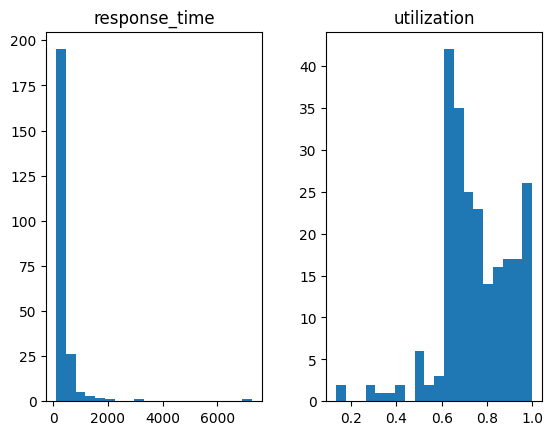

In [10]:
# Show distribution of the quality-attribute metrics
outcomes_df.hist(bins=20, grid=False)
plt.show()

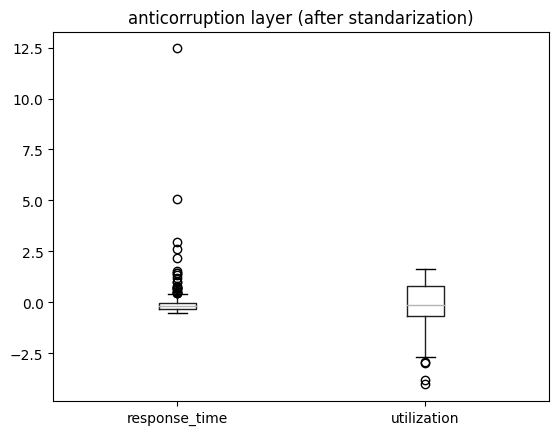

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(outcomes_df)
scaled_df = pd.DataFrame(scaled_data, columns=outcomes_df.columns)
scaled_df.boxplot(grid=False)
plt.title('anticorruption layer (after standarization)')
plt.show()

# I should probably remove outliers for response time

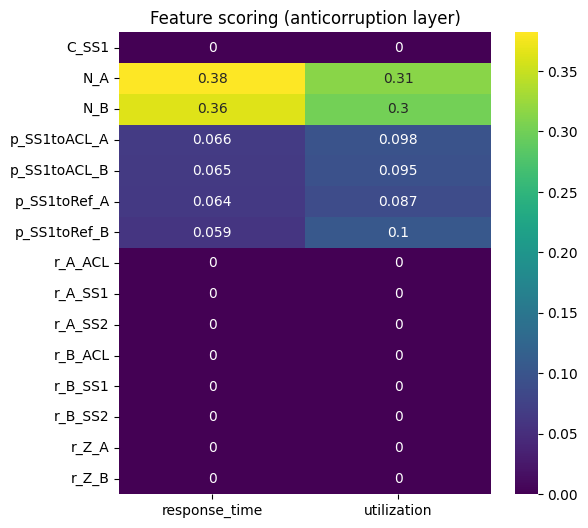

,response_time,utilization
0,,
C_SS1,0.000000,0.000000
N_A,0.382124,0.314645
N_B,0.364198,0.301443
p_SS1toACL_A,0.065984,0.098254
p_SS1toACL_B,0.065225,0.095136
p_SS1toRef_A,0.063518,0.087291
p_SS1toRef_B,0.058950,0.103231
r_A_ACL,0.000000,0.000000
r_A_SS1,0.000000,0.000000


In [12]:
policy_size = (5,3)
filter_params = None # ['N_A', 'N_B', 'r_Z_A', 'r_Z_B', 'C_SS1', 'r_A_SS1','r_B_SS1', 'p_SS1toACL_A', 'p_SS1toRef_A', 'p_SS1toACL_B', 'p_SS1toRef_B']
fs = show_feature_scores(my_space, title='Feature scoring (anticorruption layer)') #, parameters=filter_params) #, filename=None)  
fs

In [13]:
my_policies = my_space.get_configurations()
my_policies

[0]

In [14]:
outcomes_df.describe()

,response_time,utilization
count,234.000000,234.000000
mean,392.968851,0.749006
std,552.946781,0.153155
min,101.512662,0.135379
25%,211.192748,0.651076
50%,297.311635,0.731353
75%,380.418763,0.873826
max,7268.132255,0.999385


Absolute ranges: [(101, 7269), (0.13, 1.0)]
response_time [100.9, 2490.3, 4879.7, 7269.1]
utilization [0.03, 0.3866666666666667, 0.7433333333333334, 1.1]


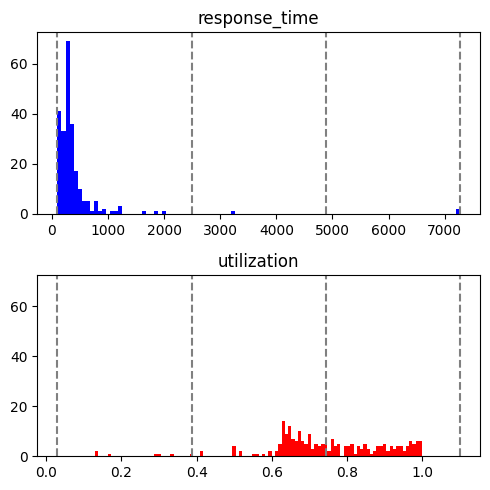

{'response_time': [100.9, 2490.3, 4879.7, 7269.1],
 'utilization': [0.03, 0.3866666666666667, 0.7433333333333334, 1.1]}

In [15]:
MIN_RESPONSE_TIME, MAX_RESPONSE_TIME = (101, 7269) #(285.0, 501.0)
MIN_UTILIZATION, MAX_UTILIZATION = (0.13, 1.0) # (0.33, 1.0)
MIN_MAX_RANGES = [(MIN_RESPONSE_TIME, MAX_RESPONSE_TIME), (MIN_UTILIZATION, MAX_UTILIZATION)]
print('Absolute ranges:', MIN_MAX_RANGES)

show_outcome_distributions(my_space, mins_maxs=MIN_MAX_RANGES, size=(5,5))

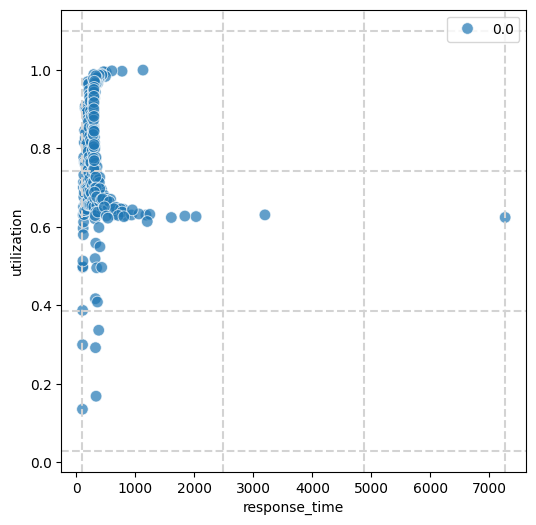

In [16]:
df = outcomes_df.copy()
df['decision'] = experiments_df['policy']
show_quality_attribute_space2D(df, MIN_MAX_RANGES, alpha=0.7)

In [17]:
# Count feasible tradeoffs in the dataset
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
print("Experiments:", experiments_df.shape)
my_space.available_tradeoffs_


Experiments: (234, 18)


Counter({'fast,average': 114,
         'fast,high': 113,
         'fast,low': 5,
         'slow,average': 1,
         'average,average': 1})

In [18]:
# Split dataset for ML analysis (train/test sets). Also outliers removal
X_train, X_test, y_train, y_test = my_space.split_dataset(test_size=0.4, remove_outliers=3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(234, 20) 234
Removing outliers ... 3
Instances to remove (outliers): {233, 7, 230, 231}
Instances to remove (not enough tradeoffs): {233, 7, 230, 231}
{'fast,high', 'fast,low', 'fast,average'}
(230, 20) 230
(138, 20) (138, 2) (92, 20) (92, 2)


In [19]:
X_train[['response_time', 'utilization']].describe()

,response_time,utilization
count,138.000000,138.000000
mean,330.705924,0.754650
std,242.027469,0.136995
min,104.205254,0.299704
25%,201.371747,0.656258
50%,293.699972,0.737290
75%,344.163077,0.856852
max,2028.120047,0.996529


In [20]:
X_test[['response_time', 'utilization']].describe()

,response_time,utilization
count,92.000000,92.000000
mean,384.988473,0.756168
std,286.365150,0.153419
min,108.660046,0.292183
25%,224.436163,0.650712
50%,314.256466,0.722951
75%,429.784646,0.890034
max,1838.705541,0.999385


Absolute ranges: [(101, 2030), (0.29, 1.0)]
response_time [100.9, 743.9666666666666, 1387.0333333333333, 2030.1]
utilization [0.18999999999999997, 0.4933333333333334, 0.7966666666666667, 1.1]


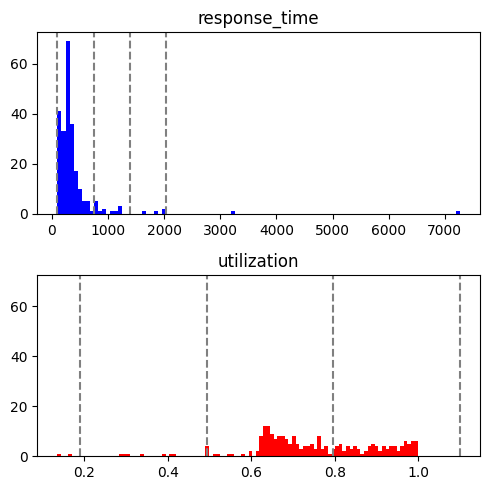

{'response_time': [100.9, 743.9666666666666, 1387.0333333333333, 2030.1],
 'utilization': [0.18999999999999997,
  0.4933333333333334,
  0.7966666666666667,
  1.1]}

In [21]:
MIN_RESPONSE_TIME, MAX_RESPONSE_TIME = (101, 2030) 
MIN_UTILIZATION, MAX_UTILIZATION = (0.29, 1.0) 
MIN_MAX_RANGES = [(MIN_RESPONSE_TIME, MAX_RESPONSE_TIME), (MIN_UTILIZATION, MAX_UTILIZATION)]
print('Absolute ranges:', MIN_MAX_RANGES)

show_outcome_distributions(my_space, mins_maxs=MIN_MAX_RANGES, size=(5,5))

In [22]:
df_concat = pd.concat([X_train, X_test], axis=0)
df_concat.reset_index(drop=True, inplace=True)
df_concat[['response_time', 'utilization']].describe()

,response_time,utilization
count,230.000000,230.000000
mean,352.418944,0.755257
std,261.422014,0.143463
min,104.205254,0.292183
25%,211.192748,0.654238
50%,297.207284,0.736604
75%,377.575600,0.878978
max,2028.120047,0.999385


Experiments: (234, 18)
Counter({'fast,average': 123, 'fast,high': 85, 'average,average': 11, 'fast,low': 6, 'slow,average': 3, 'average,high': 2})


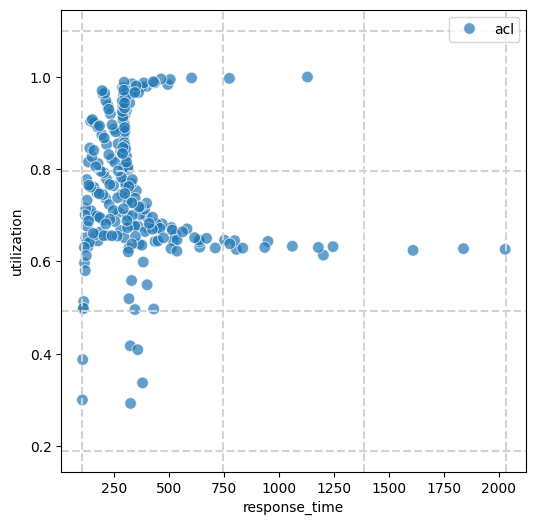

In [25]:
my_space.import_dataset(df_concat, df_concat[['response_time', 'utilization']])
 
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
print("Experiments:", experiments_df.shape)
print(my_space.available_tradeoffs_)

df = df_concat[['response_time', 'utilization','policy']].copy()
df['policy'] = 'acl'
show_quality_attribute_space2D(df, MIN_MAX_RANGES, alpha=0.7)

In [24]:
# my_space.import_dataset(X_train, y_train)

Computing robustness for all configurations (whole space)...


100%|██████████| 1/1 [00:00<00:00, 12.29it/s]

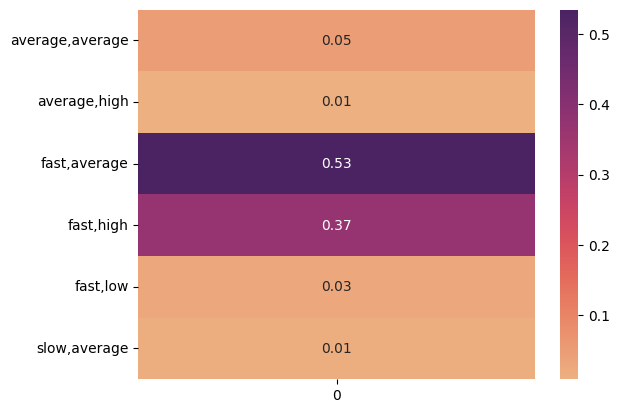

,0
"average,average",0.047826
"average,high",0.008696
"fast,average",0.534783
"fast,high",0.369565
"fast,low",0.026087
"slow,average",0.013043


In [25]:
# def compute_robustness_matrix(my_space):
#     main_dict = dict()
#     for exp in tqdm(my_space.get_configurations()):
#         print(exp)
#         main_dict[str(exp)] = dict()
#         for qa in my_space.available_tradeoffs_.keys():
#             main_dict[str(exp)][qa], _ = my_space.compute_robustness(exp, qa)
#     df = pd.DataFrame.from_dict(main_dict, orient='columns').sort_index()
#     return df

print("Computing robustness for all configurations (whole space)...")
df = my_space.compute_robustness_matrix()
# df.to_csv('./gateway_offloading_robustness_matrix.csv')

sns.heatmap(df, annot=True, fmt=".2f", cmap='flare')
plt.show()
df

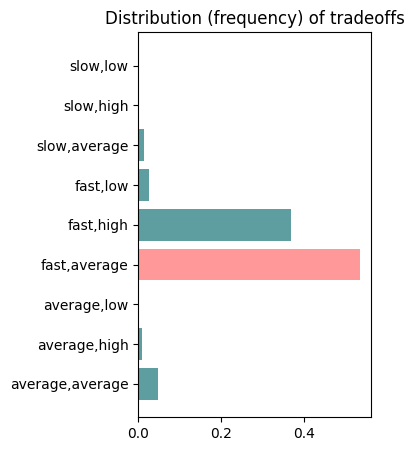

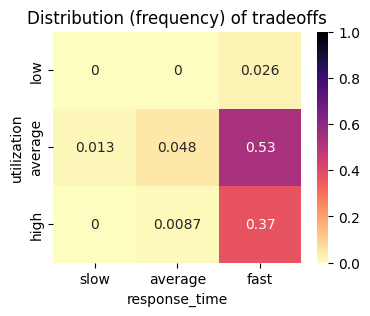

In [26]:
show_tradeoff_distribution(my_space, size=(3,5))
show_tradeoff_distribution(my_space, size=(4,3), in2D=True)

In [27]:
label_values_df = my_space.describe_labels(n_bins=3)
label_values_df

,objective,min,max,label
0,response_time,104.105254,745.476852,fast
1,response_time,745.476852,1386.848449,average
2,response_time,1386.848449,2028.220047,slow
3,utilization,0.192183,0.494584,low
4,utilization,0.494584,0.796984,average
5,utilization,0.796984,1.099385,high


  Computing robustness for all configurations (train set)...
Counter({'fast,average': 79, 'fast,high': 49, 'fast,low': 4, 'average,average': 3, 'slow,average': 2, 'average,high': 1})


100%|██████████| 1/1 [00:00<00:00, 19.56it/s]


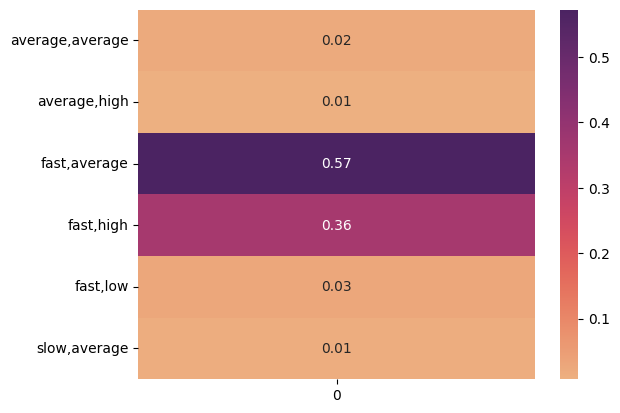

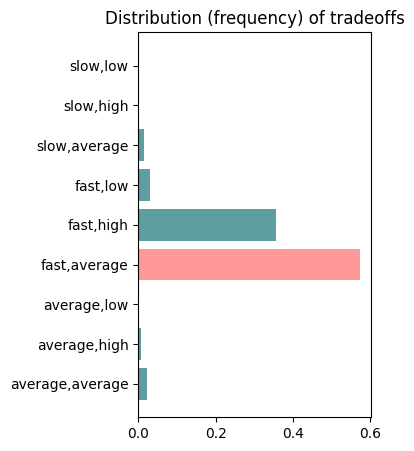

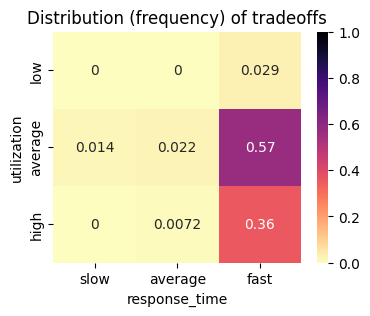

,0
"average,average",0.021739
"average,high",0.007246
"fast,average",0.572464
"fast,high",0.355072
"fast,low",0.028986
"slow,average",0.014493


In [32]:
# Work first with the train set

# my_space.import_dataset(X_test, y_test)
my_space.import_dataset(X_train, y_train)
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)

print("  Computing robustness for all configurations (train set)...")
print(my_space.available_tradeoffs_)

df = my_space.compute_robustness_matrix()
sns.heatmap(df, annot=True, fmt=".2f", cmap='flare')

show_tradeoff_distribution(my_space, size=(3,5))
show_tradeoff_distribution(my_space, size=(4,3), in2D=True)

df

  Computing robustness for all configurations (test set)...
Counter({'fast,average': 44, 'fast,high': 36, 'average,average': 8, 'fast,low': 2, 'slow,average': 1, 'average,high': 1})


100%|██████████| 1/1 [00:00<00:00, 32.23it/s]


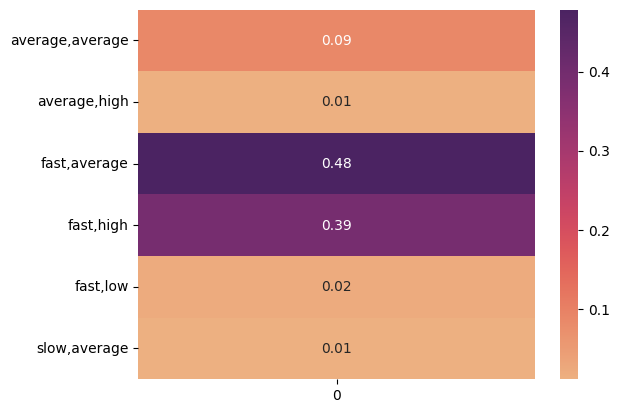

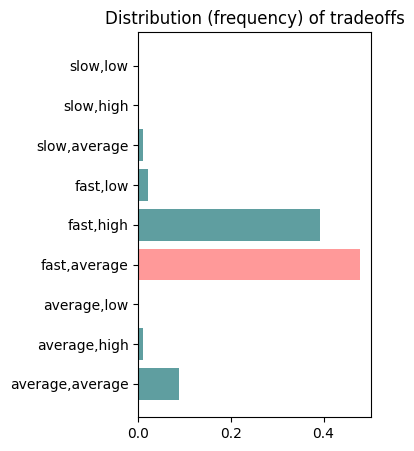

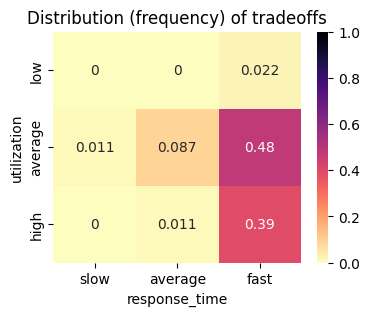

,0
"average,average",0.086957
"average,high",0.010870
"fast,average",0.478261
"fast,high",0.391304
"fast,low",0.021739
"slow,average",0.010870


In [31]:
# Work first with the test set

my_space.import_dataset(X_test, y_test)
# my_space.import_dataset(X_train, y_train)
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)

print("  Computing robustness for all configurations (test set)...")
print(my_space.available_tradeoffs_)

df = my_space.compute_robustness_matrix()
sns.heatmap(df, annot=True, fmt=".2f", cmap='flare')

show_tradeoff_distribution(my_space, size=(3,5))
show_tradeoff_distribution(my_space, size=(4,3), in2D=True)

df

In [29]:
# Run PRIM for each tradeoff using the train set, and then evaluate the robustness achieved on the test set
warnings.filterwarnings('ignore')
# my_space.import_dataset(X_train, y_train)

kp = ['N_A', 'N_B'] + ['p_SS1toACL_A', 'p_SS1toRef_A', 'p_SS1toACL_B', 'p_SS1toRef_B']

my_policies = my_space.get_configurations()
qa_labels = list(my_space.available_tradeoffs_.keys())
qa_labels.sort()
for qa_label in qa_labels:
    # Also loop over the different policies (configurations)?
    # for policy in my_policies:
        policy = None
        my_space.import_dataset(X_train, y_train)
        _ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
        n = my_space.available_tradeoffs_[qa_label]
        
        if n > 0:
            print()
            print("Checking (with PRIM) ----")
            property_to_check = my_space.get_property_box(qa_label)
            print("  Property: ", qa_label, property_to_check)
            print("  Policy: ", policy)

            try:
                box1, prange, prim_model = my_space.run_prim(property_to_check, policy=policy,
                                                         threshold=0.8, method='rhodium', # 'emaw' 'rhodium'
                                                         key_parameters=kp, verbose=False)
                # print(box1)
                print("  New ranges:",  prange)
            except Exception:
                print("EXCEPTION triggered!") 
                pass

            my_space.import_dataset(X_test, y_test)
            my_space.adjust_parameters(prange)
            _ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
            print("  Experiments:", my_space.experiments_df_.shape)
            print(my_space.compute_robustness(policy, qa_label))

            print("  Computing robustness for all configurations (test set) ...")
            df = my_space.compute_robustness_matrix()
            print(df)
            # plt.show()

my_space.import_dataset(X_train, y_train)
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)


Checking (with PRIM) ----
  Property:  average,average {'response_time': (743.9666666666666, 1387.0333333333333), 'utilization': (0.4933333333333334, 0.7966666666666667)}
  Policy:  None
  New ranges: {'N_B': {'min': 0.0, 'max': 4.0}, 'p_SS1toACL_A': {'min': 0.55, 'max': 0.9}}
  Experiments: (11, 18)
(0.0, 'average,average')
  Computing robustness for all configurations (test set) ...


100%|██████████| 1/1 [00:00<00:00, 68.87it/s]


                        0
average,average  0.636364
fast,average     0.272727
slow,average     0.090909

Checking (with PRIM) ----
  Property:  average,high {'response_time': (743.9666666666666, 1387.0333333333333), 'utilization': (0.7966666666666667, 1.1)}
  Policy:  None
  New ranges: {'N_A': {'min': 0.0, 'max': 13.0}, 'p_SS1toACL_A': {'min': 0.1, 'max': 0.15000000000000002}}
  Experiments: (7, 18)
(0.0, 'average,high')
  Computing robustness for all configurations (test set) ...


100%|██████████| 1/1 [00:00<00:00, 176.08it/s]

                     0
average,high  0.142857
fast,high     0.857143

Checking (with PRIM) ----
  Property:  fast,average {'response_time': (100.9, 743.9666666666666), 'utilization': (0.4933333333333334, 0.7966666666666667)}
  Policy:  None


  New ranges: {'N_A': {'min': 2.0, 'max': 22.0}, 'N_B': {'min': 4.0, 'max': 25.0}, 'p_SS1toACL_A': {'min': 0.6499999999999999, 'max': 0.9}}
  Experiments: (18, 18)
(0.0, 'fast,average')
  Computing robustness for all configurations (test set) ...


100%|██████████| 1/1 [00:00<00:00, 208.45it/s]

                0
fast,average  1.0

Checking (with PRIM) ----
  Property:  fast,high {'response_time': (100.9, 743.9666666666666), 'utilization': (0.7966666666666667, 1.1)}
  Policy:  None


  New ranges: {'N_A': {'min': 0.0, 'max': 15.0}, 'N_B': {'min': 7.0, 'max': 23.0}, 'p_SS1toACL_A': {'min': 0.1, 'max': 0.45}}
  Experiments: (25, 18)
(0.0, 'fast,high')
  Computing robustness for all configurations (test set) ...


100%|██████████| 1/1 [00:00<00:00, 103.29it/s]


                 0
fast,average  0.04
fast,high     0.96

Checking (with PRIM) ----
  Property:  fast,low {'response_time': (100.9, 743.9666666666666), 'utilization': (0.18999999999999997, 0.4933333333333334)}
  Policy:  None
  New ranges: {}
  Experiments: (92, 18)
(0.0, 'fast,low')
  Computing robustness for all configurations (test set) ...


100%|██████████| 1/1 [00:00<00:00, 35.69it/s]

                        0
average,average  0.086957
average,high     0.010870
fast,average     0.478261
fast,high        0.391304
fast,low         0.021739
slow,average     0.010870

Checking (with PRIM) ----
  Property:  slow,average {'response_time': (1387.0333333333333, 2030.1), 'utilization': (0.4933333333333334, 0.7966666666666667)}
  Policy:  None


  New ranges: {'N_B': {'min': 0.0, 'max': 5.0}, 'p_SS1toACL_A': {'min': 0.6499999999999999, 'max': 0.9}}
  Experiments: (9, 18)
(0.0, 'slow,average')
  Computing robustness for all configurations (test set) ...


100%|██████████| 1/1 [00:00<00:00, 73.45it/s]

                        0
average,average  0.555556
fast,average     0.333333
slow,average     0.111111


In [30]:
policy = None
my_space.import_dataset(X_train, y_train)
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
# n = my_space.available_tradeoffs_[qa_label]

kp = ['N_A', 'N_B'] + ['p_SS1toACL_A', 'p_SS1toRef_A', 'p_SS1toACL_B', 'p_SS1toRef_B']
     
print("Checking (with CART) ---- all properties")
print("  Policy: ", policy)


triple_rules, ranges, cart_model = my_space.run_cart(key_parameters=kp, prune_tree=True)
clf = cart_model.clf
print("nodes:", clf.tree_.node_count, "leaves:", clf.get_n_leaves())
print("  New ranges:")
for r in ranges.keys():
    print("\t", r, ranges[r])
print("Rules:")
for t in triple_rules:
    print(t)

print()
print("Testing ---- ")
qa_labels = list(my_space.available_tradeoffs_.keys())
qa_labels = [qa for qa in qa_labels if qa in ranges.keys()] # Not all qa labels might be covered by the CART model
qa_labels.sort()
for qa_label in qa_labels:
    print()
    property_to_check = my_space.get_property_box(qa_label)
    prange = ranges[qa_label]
    print("  Property: ", qa_label, property_to_check)
    print("  Range:",  prange)
    
    my_space.import_dataset(X_test, y_test)
    my_space.adjust_parameters(prange)
    n = my_space.available_tradeoffs_[qa_label]
    if n > 0:
        _ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)
        print("  Experiments:", my_space.experiments_df_.shape)
        if my_space.experiments_df_.shape[0] > 0:
            print(my_space.compute_robustness(policy, qa_label))

        print("  Computing robustness for all configurations (test set) ...")
        df = my_space.compute_robustness_matrix()
        print(df)
        # plt.show()
    else:
        print("  No experiments in this range")

my_space.import_dataset(X_train, y_train)
_ = my_space.discretize_outcomes(mins_maxs=MIN_MAX_RANGES)

Checking (with CART) ---- all properties
  Policy:  None
(138, 6) Index(['N_A', 'N_B', 'p_SS1toACL_A', 'p_SS1toRef_A', 'p_SS1toACL_B',
       'p_SS1toRef_B'],
      dtype='object')
Running CART ... 0.014492753623188406
nodes: 35 leaves: 24
  New ranges:
	 fast,average {'p_SS1toACL_A': {'min': 0.550000001, 'max': inf}, 'N_A': {'min': 0, 'max': 21.5}, 'N_B': {'min': 0, 'max': 19.5}}
	 fast,high {'p_SS1toACL_A': {'min': 0, 'max': 0.55}, 'N_A': {'min': 0, 'max': 17.5}, 'N_B': {'min': 12.500000001, 'max': inf}}
	 slow,average {'p_SS1toACL_A': {'min': 0.550000001, 'max': inf}, 'N_A': {'min': 21.500000001, 'max': inf}, 'N_B': {'min': 0, 'max': 1.5}}
	 fast,low {'p_SS1toACL_A': {'min': 0, 'max': 0.55}, 'N_A': {'min': 22.500000001, 'max': inf}, 'p_SS1toACL_B': {'min': 0.750000001, 'max': inf}}
	 average,average {'p_SS1toACL_A': {'min': 0.550000001, 'max': inf}, 'N_A': {'min': 21.500000001, 'max': inf}, 'N_B': {'min': 1.500000001, 'max': inf}}
Rules:
[('>', 'p_SS1toACL_A', 0.55), ('<=', 'N_A', 2

100%|██████████| 1/1 [00:00<00:00, 18.70it/s]


                     0
fast,average  0.904762
fast,high     0.095238

  Property:  fast,high {'response_time': (100.9, 743.9666666666666), 'utilization': (0.7966666666666667, 1.1)}
  Range: {'p_SS1toACL_A': {'min': 0, 'max': 0.55}, 'N_A': {'min': 0, 'max': 17.5}, 'N_B': {'min': 12.500000001, 'max': inf}}
  Experiments: (32, 18)
(0.0, 'fast,high')
  Computing robustness for all configurations (test set) ...


100%|██████████| 1/1 [00:00<00:00, 50.98it/s]


                    0
average,high  0.03125
fast,average  0.03125
fast,high     0.93750

  Property:  fast,low {'response_time': (100.9, 743.9666666666666), 'utilization': (0.18999999999999997, 0.4933333333333334)}
  Range: {'p_SS1toACL_A': {'min': 0, 'max': 0.55}, 'N_A': {'min': 22.500000001, 'max': inf}, 'p_SS1toACL_B': {'min': 0.750000001, 'max': inf}}
  Experiments: (2, 18)
(0.0, 'fast,low')
  Computing robustness for all configurations (test set) ...


100%|██████████| 1/1 [00:00<00:00, 236.95it/s]

            0
fast,low  1.0

  Property:  slow,average {'response_time': (1387.0333333333333, 2030.1), 'utilization': (0.4933333333333334, 0.7966666666666667)}
  Range: {'p_SS1toACL_A': {'min': 0.550000001, 'max': inf}, 'N_A': {'min': 21.500000001, 'max': inf}, 'N_B': {'min': 0, 'max': 1.5}}
  No experiments in this range
